### 【課題1】練習のために特徴量とカテゴリを選択
選び方は合計18通りありますが、以下の組み合わせで練習することにします。irisデータセットをWeek3同様に取得した後、データフレームからこれらを抜き出してください。

virgicolorとvirginica

sepal_lengthとpetal_length

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
iris_dataset = load_iris()

X = pd.DataFrame(iris_dataset.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
y = pd.DataFrame(iris_dataset.target, columns=["Species"])
df = pd.concat([X, y], axis=1)
print(df.columns)
df = df.query("Species == 1 | Species == 2").loc[:,["sepal_length", "petal_length", "Species"]]
df


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'Species'],
      dtype='object')


,sepal_length,petal_length,Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


### 【問題2】データの分析
まずはデータの分析を行いますが、これはWeek3の課題1で行いました。

その際出力した散布図行列を見ることで、先ほどの18通りそれぞれの散布図も確認できます。

sepal_lengthとpetal_lengthを使い、virgicolorとvirginicaを分類するのは少し難しそうな状況であることが分かるはずです。
ここでは復習を兼ねて、抜き出したデータの散布図と箱ひげ図（boxplot）、バイオリン図（violinplot）を表示してください。

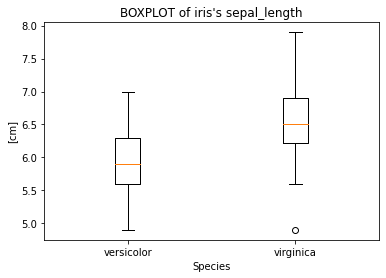

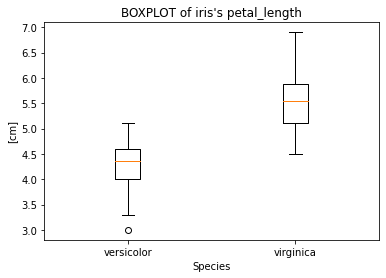

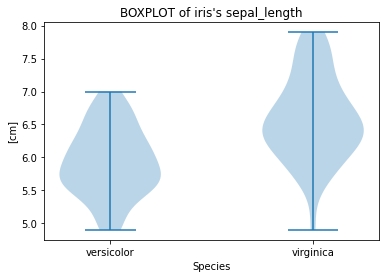

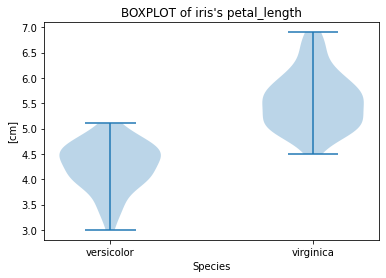

In [14]:
features = np.delete(df.columns, 2) #特徴量リストから、speciesを削除
species_names = np.delete(iris_dataset.target_names, 0) #種リストから、setosaの削除

#print(df.query("Species==1").loc[:, features[0]])
for feature in features:
    plt.boxplot((df.query("Species==1").loc[:, feature], df.query("Species==2").loc[:, feature]))
    plt.xticks([1, 2], species_names)
    plt.title("BOXPLOT of iris's {}".format(feature))
    plt.ylabel('[cm]')
    plt.xlabel('Species')
    plt.show()
    
for feature in features:
    plt.violinplot((df.query("Species==1").loc[:, feature], df.query("Species==2").loc[:, feature]))
    plt.xticks([1, 2], species_names)
    plt.title("BOXPLOT of iris's {}".format(feature))
    plt.ylabel('[cm]')
    plt.xlabel('Species')
    plt.show()

### 【問題3】前処理・訓練データと検証データの分割
前処理の一貫として、訓練データと検証データの分割を行います。今回は訓練データ75%、検証データ25%として分割してください。

scikit-learnのtrain_test_splitが利用できます。公式ドキュメントのExamplesを参考に動かしてください。

In [15]:
X = np.array(df.query("Species == 1 | Species == 2").loc[:,["sepal_length", "petal_length"]])
y = np.array(df.query("Species == 1 | Species == 2").loc[:,["Species"]])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print("X_trainのデータ数{}".format(len(X_train)))
print("X_testのデータ数{}".format(len(X_test)))
print("y_trainのデータ数{}".format(len(y_train)))
print("y_testのデータ数{}".format(len(y_test)))

X_trainのデータ数75
X_testのデータ数25
y_trainのデータ数75
y_testのデータ数25


### 【問題4】前処理・標準化
分類精度をあげるための加工を行います。手法ごとに適切な方法は異なりますが、ここでは一例として 標準化 を行うことにします。

標準化を行うライブラリもscikit-learnに用意されています。これを使って標準化してください。

sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation

In [16]:
scaler = StandardScaler()
scaler.fit(X_train)
scaler.mean_
scaler.transform(X_train)
scaler.transform(X_test)

scaler = StandardScaler()
scaler.fit(y_train)
scaler.mean_
scaler.transform(y_train)
scaler.transform(y_test)


array([[-1.01342342],
       [ 0.98675438],
       [-1.01342342],
       [ 0.98675438],
       [ 0.98675438],
       [ 0.98675438],
       [-1.01342342],
       [ 0.98675438],
       [ 0.98675438],
       [ 0.98675438],
       [ 0.98675438],
       [ 0.98675438],
       [ 0.98675438],
       [-1.01342342],
       [-1.01342342],
       [-1.01342342],
       [-1.01342342],
       [-1.01342342],
       [-1.01342342],
       [-1.01342342],
       [-1.01342342],
       [ 0.98675438],
       [-1.01342342],
       [ 0.98675438],
       [-1.01342342]])

### 【問題5】学習と推定
最近傍法（k-nearest neighbors, k-nn）で学習を行います。scikit-learnの公式ドキュメントのExamplesを参考に、k-nnの学習を行ってください。ここで入力するのは訓練データです。
sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.21.3 documentation

学習が終わった後、検証データをpredictメソッドに入力し、推定を行ってください。

パラメータが複数ありますが、今はそれらの理解を重視しません。最も基本的な要素として、n_neighborsの数があるため、これは複数試してみましょう。デフォルトの5、および1と3を最低限行ってください。5の場合を5-nn、3の場合を3-nnのように呼びます。

In [17]:
n=3
neigh = KNeighborsClassifier(n_neighbors=n)
y_train = np.array(y_train)
y_train = y_train.flatten() 

for n in range(1,20):
    neigh = KNeighborsClassifier(n_neighbors=n)
    neigh.fit(X_train, y_train)
    score = neigh.score(X_test, y_test)
    print("n={}, 予測精度は{}です。".format(n, score))

n=1, 予測精度は0.84です。
n=2, 予測精度は0.88です。
n=3, 予測精度は0.92です。
n=4, 予測精度は0.92です。
n=5, 予測精度は0.92です。
n=6, 予測精度は0.92です。
n=7, 予測精度は0.88です。
n=8, 予測精度は0.92です。
n=9, 予測精度は0.92です。
n=10, 予測精度は0.92です。
n=11, 予測精度は0.92です。
n=12, 予測精度は0.92です。
n=13, 予測精度は0.92です。
n=14, 予測精度は0.88です。
n=15, 予測精度は0.84です。
n=16, 予測精度は0.88です。
n=17, 予測精度は0.84です。
n=18, 予測精度は0.84です。
n=19, 予測精度は0.84です。


### 【問題6】評価
検証データの特徴量を入力して得られた推定値と、検証データの正解値の近さを計算し、学習したモデルを評価します。

2値分類を評価するための指標値には Accuracy（正解率）、Precision（適合率）、Recall（再現率）、F値 があります。それぞれの意味を理解するには、 混同行列（confusion matrix） を見ることになります。

scikit-learnを使い4種類の指標を計算する

混同行列をscikit-learnを使い表示する

4種類の指標値の意味について簡単に調査して文章でまとめる

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

n=3
y_train = y_train.flatten() 
neigh = KNeighborsClassifier(n_neighbors=n)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)

print("正解率：", accuracy_score(y_test, y_pred)) #accuracy=(TP+TN) / (TP+TN+FP+FN)
print("適合率:", precision_score(y_test, y_pred, pos_label=1)) #precision=TP / (TP+FP) 陽性と予測されたサンプルのうち正解したサンプルの割合
print("再現率:", recall_score(y_test, y_pred, pos_label=1)) #recall= TP/ (TP+FN)　実際に陽性のサンプルのうち正解したサンプルの割合
print("F値:", f1_score(y_test, y_pred, average='macro')) #F値 マクロ平均としたが算出方法はどれが適切なのか？
print(confusion_matrix(y_test, y_pred))

#                      Predicted
#                 Negative  Positive
#Actual Negative     TN        FP (予測:2, 真の値:1のパターンが２個)
#       Positive     FN        TP (予測:2, 真の値:2のパターンが1２個)
# Species==1がネガティブ、==2がポジティブと判定されている。
#print(np.hstack((y_pred.reshape(25,1), y_test)))

正解率： 0.92
適合率: 1.0
再現率: 0.8461538461538461
F値: 0.9198717948717948
[[11  2]
 [ 0 12]]


正解率 (accuracy)：正や負と予測したデータのうち，実際にそうであるものの割合
適合率 (precision)：正と予測したデータのうち，実際に正であるものの割合
再現率 (recall：実際に正であるもののうち，正であると予測されたものの割合
F値 (F-measure)：再現率と適合率の調和平均

### 【問題7】可視化
評価の一貫として可視化を行います。今回の場合2次元の特徴量で分類を行いましたから、散布図で可視化が可能です。

以下にどう分割するかという 決定領域 を描く関数を用意しました。これを利用して可視化を行ってください。

Xとyには訓練データまたは検証データを与えます。

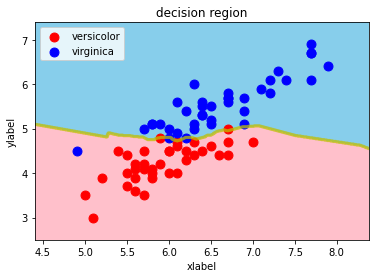

In [19]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
        
    """
    
    
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

y_train = y_train.flatten() 
decision_region(X_train, y_train, neigh.fit(X_train, y_train))


### 【問題8】他の手法の学習
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と決定領域を利用して結果を簡単に考察してください。どの手法がどの指標値で良かったかや、どういった決定領域になっていたかを述べてください。

最近傍法

ロジスティック回帰

SVM

決定木

ランダムフォレスト

【ロジスティック回帰】
正解率： 0.88
適合率: 1.0
再現率: 0.7692307692307693
F値: 0.8792270531400967
[[10  3]
 [ 0 12]]


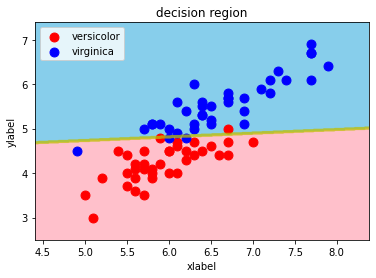

In [20]:
#ロジスティック回帰
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("【ロジスティック回帰】")
print("正解率：", accuracy_score(y_test, y_pred)) #accuracy=(TP+TN) / (TP+TN+FP+FN)
print("適合率:", precision_score(y_test, y_pred, pos_label=1)) #precision=TP / (TP+FP) 陽性と予測されたサンプルのうち正解したサンプルの割合
print("再現率:", recall_score(y_test, y_pred, pos_label=1)) #recall= TP/ (TP+FN)　実際に陽性のサンプルのうち正解したサンプルの割合
print("F値:", f1_score(y_test, y_pred, average='macro')) #F値 マクロ平均としたが算出方法はどれが適切なのか？
print(confusion_matrix(y_test, y_pred))
decision_region(X_train, y_train, clf.fit(X_train, y_train))

【SVM】
正解率： 0.92
適合率: 1.0
再現率: 0.8461538461538461
F値: 0.9198717948717948
[[11  2]
 [ 0 12]]


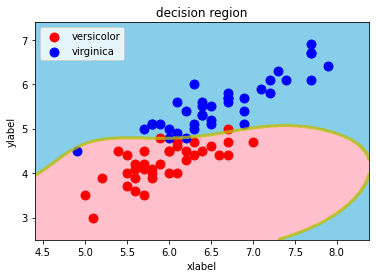

In [21]:
#SVM
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("【SVM】")
print("正解率：", accuracy_score(y_test, y_pred)) #accuracy=(TP+TN) / (TP+TN+FP+FN)
print("適合率:", precision_score(y_test, y_pred, pos_label=1)) #precision=TP / (TP+FP) 陽性と予測されたサンプルのうち正解したサンプルの割合
print("再現率:", recall_score(y_test, y_pred, pos_label=1)) #recall= TP/ (TP+FN)　実際に陽性のサンプルのうち正解したサンプルの割合
print("F値:", f1_score(y_test, y_pred, average='macro')) #F値 マクロ平均としたが算出方法はどれが適切なのか？
print(confusion_matrix(y_test, y_pred))
decision_region(X_train, y_train, clf.fit(X_train, y_train))

【決定木】
正解率： 0.84
適合率: 0.9090909090909091
再現率: 0.7692307692307693
F値: 0.8397435897435896
[[10  3]
 [ 1 11]]


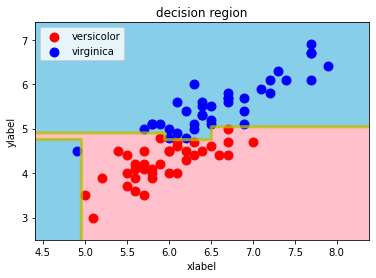

In [22]:
#決定木
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("【決定木】")
print("正解率：", accuracy_score(y_test, y_pred)) #accuracy=(TP+TN) / (TP+TN+FP+FN)
print("適合率:", precision_score(y_test, y_pred, pos_label=1)) #precision=TP / (TP+FP) 陽性と予測されたサンプルのうち正解したサンプルの割合
print("再現率:", recall_score(y_test, y_pred, pos_label=1)) #recall= TP/ (TP+FN)　実際に陽性のサンプルのうち正解したサンプルの割合
print("F値:", f1_score(y_test, y_pred, average='macro')) #F値 マクロ平均としたが算出方法はどれが適切なのか？
print(confusion_matrix(y_test, y_pred))
decision_region(X_train, y_train, clf.fit(X_train, y_train))

【ランダムフォレスト】
正解率： 0.84
適合率: 1.0
再現率: 0.6923076923076923
F値: 0.8376623376623376
[[ 9  4]
 [ 0 12]]


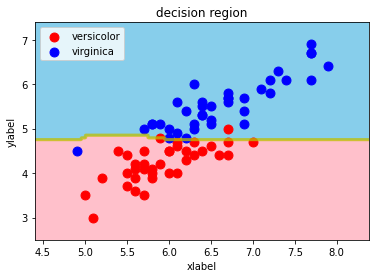

In [23]:
#ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("【ランダムフォレスト】")
print("正解率：", accuracy_score(y_test, y_pred)) #accuracy=(TP+TN) / (TP+TN+FP+FN)
print("適合率:", precision_score(y_test, y_pred, pos_label=1)) #precision=TP / (TP+FP) 陽性と予測されたサンプルのうち正解したサンプルの割合
print("再現率:", recall_score(y_test, y_pred, pos_label=1)) #recall= TP/ (TP+FN)　実際に陽性のサンプルのうち正解したサンプルの割合
print("F値:", f1_score(y_test, y_pred, average='macro')) #F値 マクロ平均としたが算出方法はどれが適切なのか？
print(confusion_matrix(y_test, y_pred))
decision_region(X_train, y_train, clf.fit(X_train, y_train))

各手法による評価結果を下表にまとめた。
今回のケースでは、最近傍法、SVMがより良い判定ができていると言える。

判定の境界線を図示した際に、境界線がサンプル要素に合わせて曲線となる手法では良い結果となったが、

直線となっているロジスティック回帰等では、今回のケースでは適さないと想定される。

|      |  最近傍法  |  ロジスティック回帰  |   SVM   |  決定木   |   ランダムフォレスト    |
|:----:|  :----:  |     :----:       | :----:  | :----:   | :----:             |
|正解率|  0.92     |    0.88          |   0.92  |   0.84   |   0.84             |
|適合率|  1.0      |     1.0          |     1.0 |    0.91  |   1.0              |
|再現率|  0.85     |     0.77         |    0.85 |   0.77   |   0.69             |
|F値  |  0.92     |    0.88          |   0.92   |   0.84   |  0.84             |